In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from scipy.io import loadmat
import random
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [5]:
dataBaseline = loadmat(r"Dados12-06_Baseline.mat")
dataCincoP = loadmat(r"Dados12-06_CincoP.mat")
dataCinquenta = loadmat(r"Dados12-06_CinquentaP.mat")
dataDez = loadmat(r"Dados12-06_DezP.mat")
dataVinte = loadmat(r"Dados12-06_VinteP.mat")

In [6]:
dataBaseline = dataBaseline['Baseline']
dataCincoP = dataCincoP['CincoP']
dataCinquenta = dataCinquenta['CinquentaP']
dataDez = dataDez['DezP']
dataVinte = dataVinte['VinteP']

dadosRigidez = pd.DataFrame()

# Adicionar dataBaseline com coluna y_Baseline
dataBaseline_df = pd.DataFrame(dataBaseline)
dataBaseline_df['y_Baseline'] = 1
#Dados de teste
dataBaseline_sampled = dataBaseline_df.sample(n=100, random_state=42)
dadosRigidez = pd.concat([dadosRigidez, dataBaseline_df], ignore_index=True)
dadosRigidez = dadosRigidez.drop(dataBaseline_sampled.index)

# Adicionar dataCincoP com coluna y_CincoP
dataCincoP_df = pd.DataFrame(dataCincoP)
dataCincoP_df['y_CincoP'] = 1
#Dados de teste
dataCincoP_sampled = dataCincoP_df.sample(n=100, random_state=42)
dadosRigidez = pd.concat([dadosRigidez, dataCincoP_df], ignore_index=True)
dadosRigidez = dadosRigidez.drop(dataCincoP_sampled.index)


# Adicionar dataDez com coluna y_DezP
dataDez_df = pd.DataFrame(dataDez)
dataDez_df['y_DezP'] = 1
#Dados de teste
dataDez_sampled = dataDez_df.sample(n=100, random_state=42)
dadosRigidez = pd.concat([dadosRigidez, dataDez_df], ignore_index=True)
dadosRigidez = dadosRigidez.drop(dataDez_sampled.index)

# Adicionar dataVinte com coluna y_VinteP
dataVinte_df = pd.DataFrame(dataVinte)
dataVinte_df['y_VinteP'] = 1
#Dados de teste
dataVinte_sampled = dataVinte_df.sample(n=100, random_state=42)
dadosRigidez = pd.concat([dadosRigidez, dataVinte_df], ignore_index=True)
dadosRigidez = dadosRigidez.drop(dataVinte_sampled.index)


# Adicionar dataCinquenta com coluna y_CinquentaP
dataCinquenta_df = pd.DataFrame(dataCinquenta)
dataCinquenta_df['y_CinquentaP'] = 1
#Dados de teste
dataCinquenta_sampled = dataCinquenta_df.sample(n=100, random_state=42)
dadosRigidez = pd.concat([dadosRigidez, dataCinquenta_df], ignore_index=True)
dadosRigidez = dadosRigidez.drop(dataCinquenta_sampled.index)


#Dados de teste

dadosRigidezTeste = pd.concat([dataBaseline_sampled, dataCincoP_sampled, dataDez_sampled, dataVinte_sampled, dataCinquenta_sampled], ignore_index = True) 

In [7]:
dadosRigidez = dadosRigidez.fillna(0)
dadosRigidezTeste = dadosRigidezTeste.fillna(0)

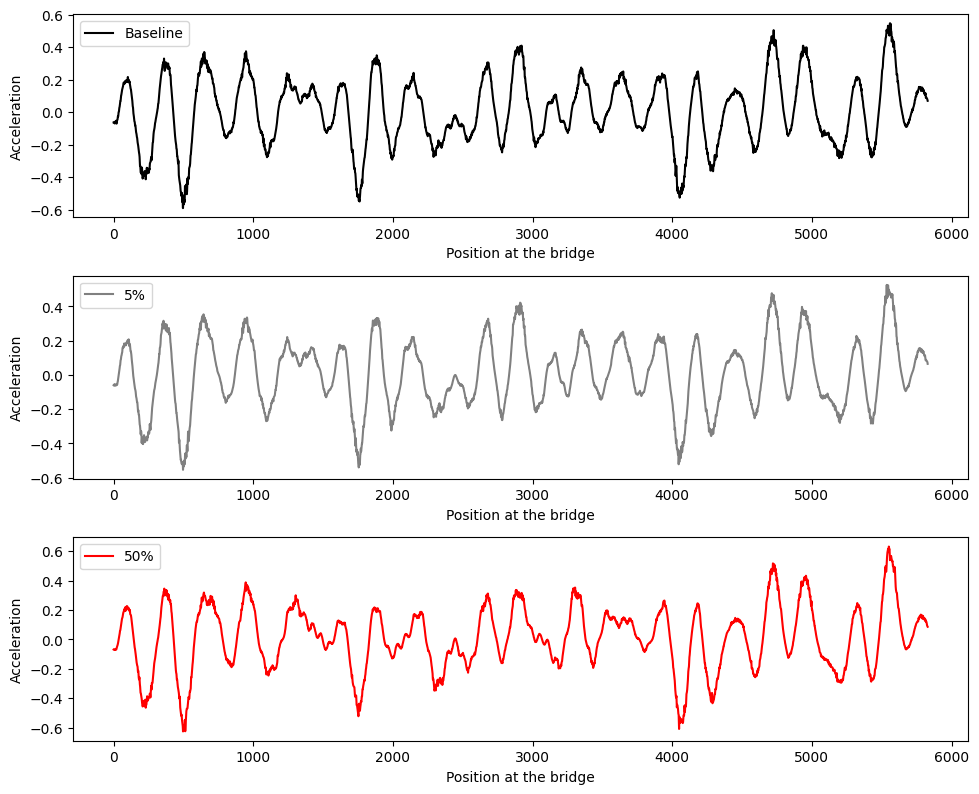

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Função para obter um exemplo de cada categoria
def get_example_category(dadosRigidez, category):
    category_dadosRigidez = dadosRigidez[dadosRigidez[category] == 1]
    if len(category_dadosRigidez) == 0:
        return None  # ou return np.nan
    return category_dadosRigidez.sample(n=1, random_state=42).drop(['y_Baseline','y_CincoP','y_DezP','y_VinteP','y_CinquentaP'], axis=1)

# Obtendo um exemplo de cada categoria em variáveis separadas
exemplo_baseline = get_example_category(dadosRigidez, 'y_Baseline')
exemplo_cinco = get_example_category(dadosRigidez, 'y_CincoP')
exemplo_cinquenta = get_example_category(dadosRigidez, 'y_CinquentaP')

x = range(5830)  # Eixo x de 0 a 5830

fig, axs = plt.subplots(3, 1, figsize=(10, 8))  # Criação dos subplots

# Plotagem do exemplo_baseline
axs[0].plot(x, exemplo_baseline.values.flatten(), label='Baseline', color='black')
axs[0].set_xlabel('Position at the bridge')
axs[0].set_ylabel('Acceleration')
axs[0].legend()

# Plotagem do exemplo_cinco
axs[1].plot(x, exemplo_cinco.values.flatten(), label='5%', color='gray')
axs[1].set_xlabel('Position at the bridge')
axs[1].set_ylabel('Acceleration')
axs[1].legend()

# Plotagem do exemplo_cinquenta
axs[2].plot(x, exemplo_cinquenta.values.flatten(), label='50%', color='red')
axs[2].set_xlabel('Position at the bridge')
axs[2].set_ylabel('Acceleration')
axs[2].legend()

plt.tight_layout()
plt.show()


In [10]:
x_train = dadosRigidez.drop(['y_Baseline', 'y_CinquentaP', 'y_VinteP','y_DezP','y_CincoP'], axis = 1)
y_train = pd.DataFrame().assign(Baseline=dadosRigidez['y_Baseline'].values, Cinco = dadosRigidez['y_CincoP'].values, Dez = dadosRigidez['y_DezP'].values, Vinte = dadosRigidez['y_VinteP'].values, Cinquenta = dadosRigidez['y_CinquentaP'].values)

In [11]:
x_test = dadosRigidezTeste.drop(['y_Baseline', 'y_CinquentaP', 'y_VinteP','y_DezP','y_CincoP'], axis = 1)
y_test = pd.DataFrame().assign(Baseline=dadosRigidezTeste['y_Baseline'].values, Cinco = dadosRigidezTeste['y_CincoP'].values, Dez = dadosRigidezTeste['y_DezP'].values, Vinte = dadosRigidezTeste['y_VinteP'].values, Cinquenta = dadosRigidezTeste['y_CinquentaP'].values)

In [12]:
dadosRigidezTeste

,0,1,2,3,4,5,6,7,8,9,...,5825,5826,5827,5828,5829,y_Baseline,y_CincoP,y_DezP,y_VinteP,y_CinquentaP
0,-0.059153,-0.055940,-0.057834,-0.063312,-0.067667,-0.063771,-0.059874,-0.060163,-0.062691,-0.064611,...,0.082538,0.087795,0.078277,0.068620,0.064763,1.0,0.0,0.0,0.0,0.0
1,-0.075089,-0.077143,-0.079198,-0.079462,-0.077463,-0.075463,-0.075456,-0.076247,-0.077037,-0.075682,...,0.110190,0.103207,0.096225,0.092736,0.094569,1.0,0.0,0.0,0.0,0.0
2,-0.059412,-0.065525,-0.067751,-0.061163,-0.054574,-0.059001,-0.066020,-0.070043,-0.067484,-0.064925,...,0.085685,0.085431,0.083014,0.080134,0.077107,1.0,0.0,0.0,0.0,0.0
3,-0.058128,-0.058195,-0.057923,-0.057175,-0.055915,-0.054815,-0.055068,-0.055320,-0.056017,-0.056878,...,0.072556,0.069953,0.067350,0.065357,0.063376,1.0,0.0,0.0,0.0,0.0
4,-0.053927,-0.057962,-0.061254,-0.062415,-0.063284,-0.063546,-0.065156,-0.068865,-0.072678,-0.076613,...,0.021576,0.016763,0.012730,0.008963,0.003698,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.055945,-0.051902,-0.053300,-0.061845,-0.070391,-0.065605,-0.060210,-0.059155,-0.062793,-0.066395,...,0.075560,0.079380,0.083200,0.078165,0.070535,0.0,0.0,0.0,0.0,1.0
496,-0.070637,-0.073940,-0.075904,-0.077982,-0.080243,-0.079448,-0.076168,-0.080766,-0.088469,-0.088346,...,0.004510,0.000392,-0.003194,-0.007141,-0.011584,0.0,0.0,0.0,0.0,1.0
497,-0.057099,-0.060789,-0.063908,-0.066328,-0.067794,-0.068191,-0.069053,-0.070391,-0.071352,-0.071957,...,0.032931,0.027802,0.021578,0.016959,0.013360,0.0,0.0,0.0,0.0,1.0
498,-0.068606,-0.073333,-0.075273,-0.074481,-0.069319,-0.072668,-0.075948,-0.075208,-0.077872,-0.078959,...,-0.011145,-0.013264,-0.015611,-0.017662,-0.018632,0.0,0.0,0.0,0.0,1.0


In [13]:
x_train = x_train.values
x_test = x_test.values

In [17]:
Kclassif = KNeighborsClassifier(n_neighbors=5)
Kclassif.fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Kclassif, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}%")


Score for fold 1: 0.2425
Score for fold 2: 0.7925
Score for fold 3: 0.8875
Score for fold 4: 0.9075
Score for fold 5: 0.975
Average score: 76.1%


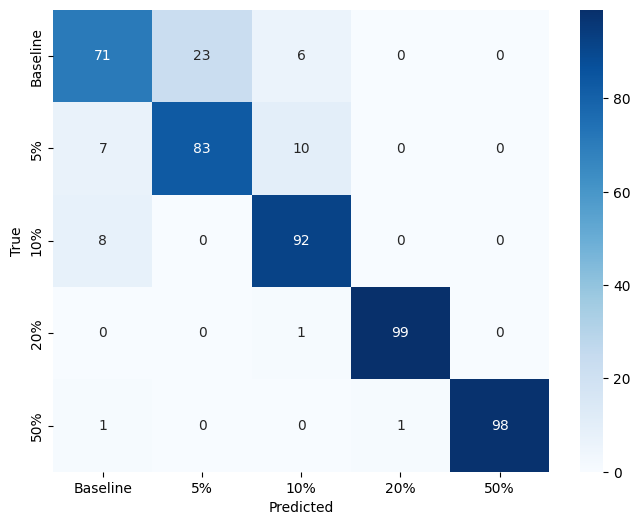

In [18]:
# Previsões KNeighborsClassifier

# Definindo o dicionário de nomes das classes
class_names = {
    0: 'Baseline',
    1: '5%',
    2: '10%',
    3: '20%',
    4: '50%'
}

ytestpred = Kclassif.predict(x_test)

# Cálculo da matriz de confusão
confusion_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(ytestpred, axis=1))

# Plotando a matriz de confusão com os nomes das classes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
from sklearn.tree import DecisionTreeClassifier

Dec = DecisionTreeClassifier().fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Dec, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}% Correto!")

Score for fold 1: 0.225
Score for fold 2: 0.7625
Score for fold 3: 0.7875
Score for fold 4: 0.91
Score for fold 5: 0.9525
Average score: 72.75% Correto!


In [20]:
ytestpred = Dec.predict(x_test)


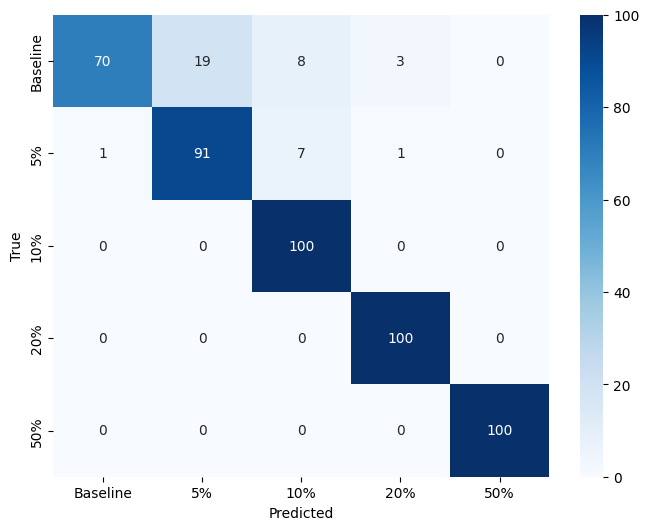

In [21]:
# Previsões DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Definindo o dicionário de nomes das classes
class_names = {
    0: 'Baseline',
    1: '5%',
    2: '10%',
    3: '20%',
    4: '50%'
}

ytestpred = Dec.predict(x_test)

# Cálculo da matriz de confusão
confusion_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(ytestpred, axis=1))

# Plotando a matriz de confusão com os nomes das classes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(5830, 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

c:\Users\Leonardo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 5828, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2914, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2912, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1456, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1454, 64)       │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93056)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     2,977,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,996,677 (11.43 MB)

 Trainable params: 2,996,677 (11.43 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2 ,random_state=42)

In [25]:
history = model.fit(x_train, y_train, epochs=40, batch_size=50, validation_data=(x_val, y_val))

Epoch 1/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.2822 - loss: 1.5545 - val_accuracy: 0.3675 - val_loss: 1.4089
Epoch 2/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.4536 - loss: 1.2968 - val_accuracy: 0.5050 - val_loss: 1.0139
Epoch 3/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.5237 - loss: 1.0234 - val_accuracy: 0.5100 - val_loss: 0.9464
Epoch 4/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.5480 - loss: 0.9545 - val_accuracy: 0.6100 - val_loss: 0.7931
Epoch 5/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.6626 - loss: 0.7775 - val_accuracy: 0.5250 - val_loss: 0.7821
Epoch 6/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.6958 - loss: 0.6539 - val_accuracy: 0.6850 - val_loss: 0.6563
Epoch 7/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.7552 - loss: 0.5656 - val_accuracy: 0.7650 - val_loss: 0.5015
Epoch 8/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.7577 - loss: 0.5333 - val_accuracy: 0.

In [ ]:
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import accuracy_score


# ytestpred = model.predict(x_test)
# print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test.argmax(axis=1), ytestpred.argmax(axis=1))))

# #Your input to confusion_matrix must be an array of int not one hot encodings.
# ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), ytestpred.argmax(axis=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


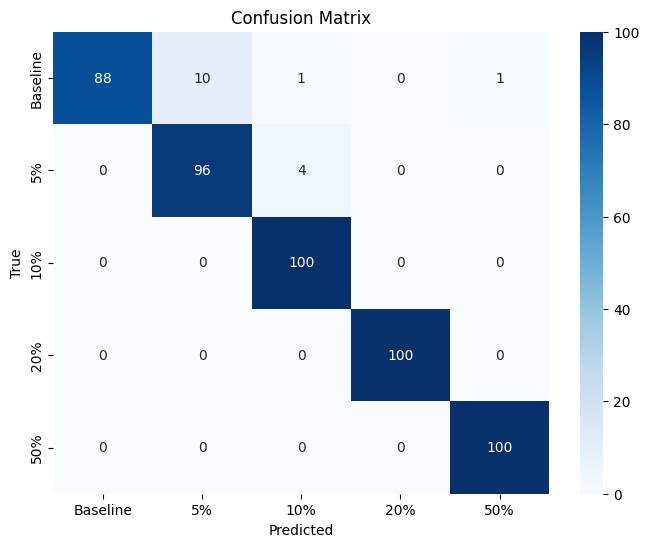

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Definindo o dicionário de nomes das classes
class_names = {
    0: 'Baseline',
    1: '5%',
    2: '10%',
    3: '20%',
    4: '50%'
}

ytestpred = model.predict(x_test)

# Cálculo da matriz de confusão
confusion_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(ytestpred, axis=1))

# Plotando a matriz de confusão com os nomes das classes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [56]:
baseline_data = dataBaseline_sampled.drop('y_Baseline',axis=1)
damage_5_percent_data = dataCincoP_sampled.drop('y_CincoP',axis=1)
damage_10_percent_data = dataDez_sampled.drop('y_DezP',axis=1)
damage_20_percent_data = dataVinte_sampled.drop('y_VinteP',axis=1)
damage_50_percent_data = dataCinquenta_sampled.drop('y_CinquentaP',axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


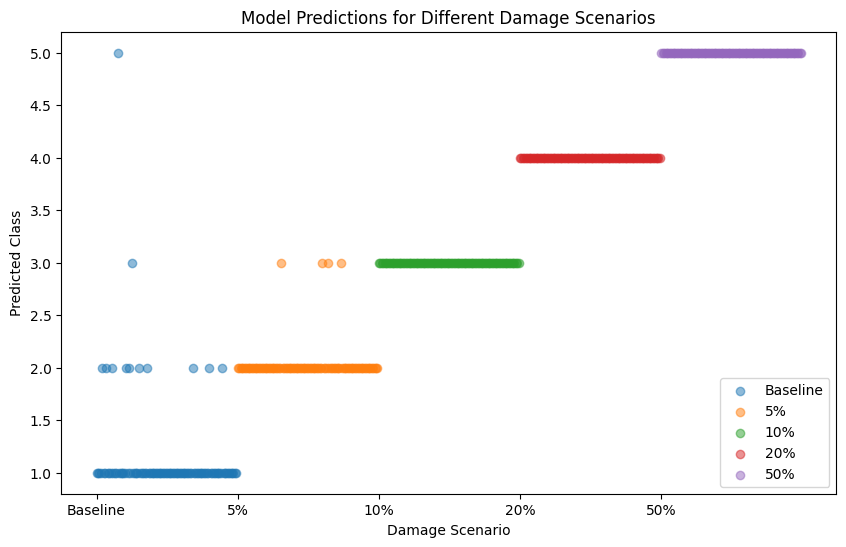

In [28]:
# Suponhamos que você tem os dados de treino x_train
# Separados por cenário de dano, onde cada cenário é um numpy array
baseline_data = dataBaseline_sampled.drop('y_Baseline',axis=1).values
damage_5_percent_data = dataCincoP_sampled.drop('y_CincoP',axis=1).values
damage_10_percent_data = dataDez_sampled.drop('y_DezP',axis=1).values
damage_20_percent_data = dataVinte_sampled.drop('y_VinteP',axis=1).values
damage_50_percent_data = dataCinquenta_sampled.drop('y_CinquentaP',axis=1).values

# Lista para armazenar os resultados das previsões
predictions = []

# Fazendo as previsões para cada cenário de dano
for data in [baseline_data, damage_5_percent_data, damage_10_percent_data, damage_20_percent_data, damage_50_percent_data]:
    y_pred = model.predict(data)
    predictions.append(y_pred)

# Plotagem dos resultados
plt.figure(figsize=(10, 6))

for i, pred in enumerate(predictions):
    # Pegando a classe com maior probabilidade para cada previsão
    max_prob_classes = np.argmax(pred, axis=1)
    plt.scatter(range(i * 100, (i + 1) * 100), max_prob_classes + 1, label=class_names[i], alpha=0.5)

plt.xticks(range(0, 500, 100), ['Baseline', '5%', '10%', '20%', '50%'])
plt.xlabel('Damage Scenario')
plt.ylabel('Predicted Class')
plt.title('Model Predictions for Different Damage Scenarios')
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


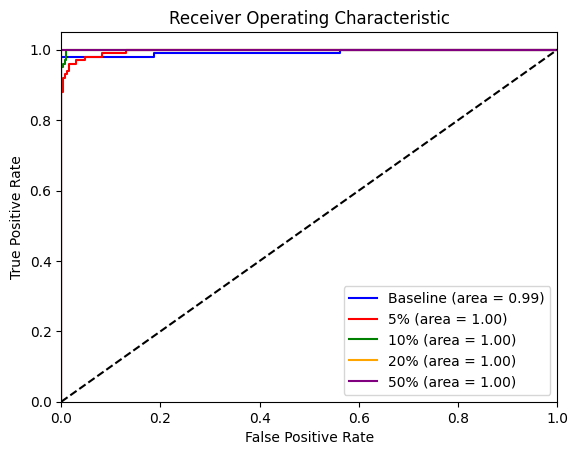

In [29]:
from sklearn.metrics import roc_curve, auc

# Obter as probabilidades previstas do modelo
y_pred_prob = model.predict(x_test)
y_test = np.array(y_test)
# Calcular a curva ROC para cada classe
fpr = {} # Taxas de falso positivo (FPR)
tpr = {} # Verdadeiro positivo (TPR)
roc_auc = {} # Área sob a curva ROC (AUC)
num_classes = 5 #Número de classes (Baseline, Cinquenta, Vinte, Dez, Cinco)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='{} (area = {:.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [30]:
lista = []
n = 4000
for i in range(1829):
    lista.append(n)
    n += 1

for i in range(4001, 5830):
    dadosRigidez.drop(i, axis=1, inplace=True)

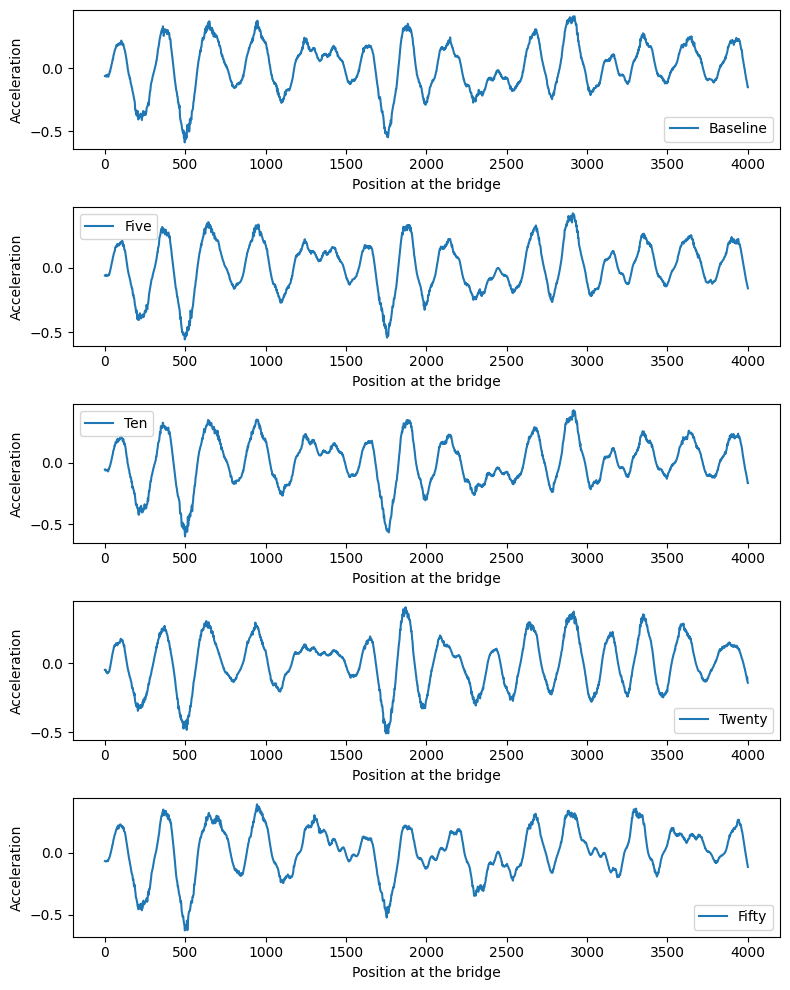

In [31]:
# Function to get one example from each category
def get_example_category(dadosRigidez, category):
    category_dadosRigidez = dadosRigidez[dadosRigidez[category] == 1]
    if len(category_dadosRigidez) == 0:
        return None  # or return np.nan
    return category_dadosRigidez.sample(n=1, random_state=42).drop(['y_Baseline','y_CincoP','y_DezP','y_VinteP','y_CinquentaP'], axis=1)

# Get one example from each category into separate variables
exemplo_baseline = get_example_category(dadosRigidez, 'y_Baseline')
exemplo_cinco = get_example_category(dadosRigidez, 'y_CincoP')
exemplo_dez = get_example_category(dadosRigidez, 'y_DezP')
exemplo_vinte = get_example_category(dadosRigidez, 'y_VinteP')
exemplo_cinquenta = get_example_category(dadosRigidez, 'y_CinquentaP')

x = range(4001)  # Eixo x de 0 a 5830

fig, axs = plt.subplots(5, 1, figsize=(8, 10))  # Criação dos subplots

# Plotagem do exemplo_baseline
axs[0].plot(x, exemplo_baseline.values.flatten(), label='Baseline')
axs[0].set_xlabel('Position at the bridge')
axs[0].set_ylabel('Acceleration')
axs[0].legend()

# Plotagem do exemplo_cinquenta
axs[1].plot(x, exemplo_cinco.values.flatten(), label='Five')
axs[1].set_xlabel('Position at the bridge')
axs[1].set_ylabel('Acceleration')
axs[1].legend()

axs[2].plot(x, exemplo_dez.values.flatten(), label='Ten')
axs[2].set_xlabel('Position at the bridge')
axs[2].set_ylabel('Acceleration')
axs[2].legend()

axs[3].plot(x, exemplo_vinte.values.flatten(), label='Twenty')
axs[3].set_xlabel('Position at the bridge')
axs[3].set_ylabel('Acceleration')
axs[3].legend()

axs[4].plot(x, exemplo_cinquenta.values.flatten(), label='Fifty')
axs[4].set_xlabel('Position at the bridge')
axs[4].set_ylabel('Acceleration')
axs[4].legend()

plt.tight_layout()
plt.show()


In [32]:
x = dadosRigidez.drop(['y_Baseline', 'y_CinquentaP', 'y_VinteP','y_DezP','y_CincoP'], axis = 1)
y = pd.DataFrame().assign(Baseline=dadosRigidez['y_Baseline'].values, Cinco = dadosRigidez['y_CincoP'].values, Dez = dadosRigidez['y_DezP'].values, Vinte = dadosRigidez['y_VinteP'].values, Cinquenta = dadosRigidez['y_CinquentaP'].values)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
x_train = x_train.values
x_test = x_test.values

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Kclassif = KNeighborsClassifier(n_neighbors=5)
Kclassif.fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Kclassif, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}%")


Score for fold 1: 0.878125
Score for fold 2: 0.890625
Score for fold 3: 0.8625
Score for fold 4: 0.90625
Score for fold 5: 0.9
Average score: 88.75%


In [50]:


model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(4001, 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
]) 


c:\Users\Leonardo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 3999, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 1999, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 1997, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 998, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 63872)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     4,087,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,094,533 (15.62 MB)

 Trainable params: 4,094,533 (15.62 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2 ,random_state=42)

In [53]:
history = model_2.fit(x_train, y_train, epochs=35, batch_size=50, validation_data=(x_val, y_val))

Epoch 1/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.2832 - loss: 1.6006 - val_accuracy: 0.3024 - val_loss: 1.4871
Epoch 2/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.3327 - loss: 1.4862 - val_accuracy: 0.4049 - val_loss: 1.3808
Epoch 3/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.4210 - loss: 1.3778 - val_accuracy: 0.4878 - val_loss: 1.1666
Epoch 4/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.4850 - loss: 1.1668 - val_accuracy: 0.6098 - val_loss: 1.0152
Epoch 5/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5742 - loss: 1.0634 - val_accuracy: 0.5463 - val_loss: 0.9707
Epoch 6/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.6051 - loss: 0.9009 - val_accuracy: 0.6488 - val_loss: 0.9198
Epoch 7/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.6782 - loss: 0.8976 - val_accuracy: 0.6439 - val_loss: 0.8876
Epoch 8/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5913 - loss: 0.9179 - val_accuracy: 0.668

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


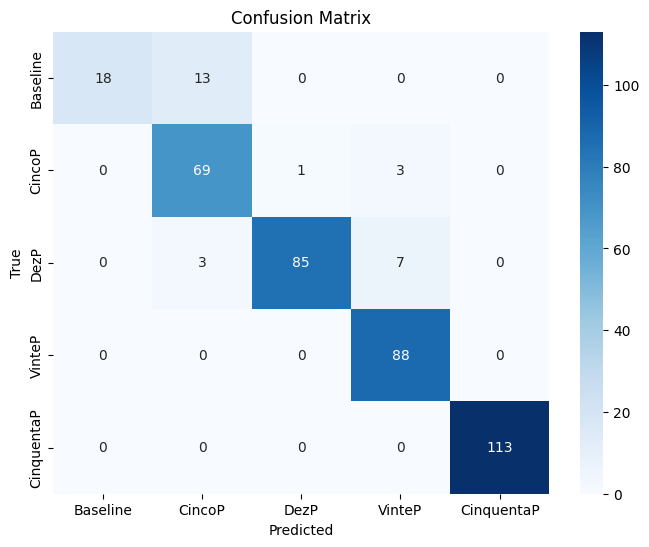

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = {
    0: 'Baseline',
    1: 'CincoP',
    2: 'DezP',
    3: 'VinteP',
    4: 'CinquentaP'
}

ytestpred = model_2.predict(x_test)

# Cálculo da matriz de confusão
confusion_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(ytestpred, axis=1))

# Plotando a matriz de confusão com os nomes das classes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


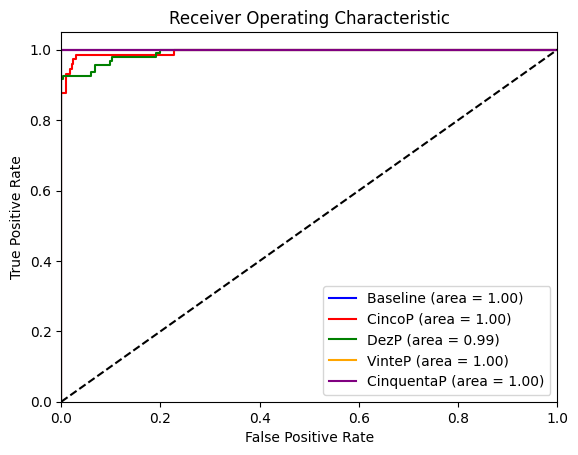

In [55]:
# Obter as probabilidades previstas do modelo
y_pred_prob = model.predict(x_test)
y_test = np.array(y_test)
# Calcular a curva ROC para cada classe
fpr = {} # Taxas de falso positivo (FPR)
tpr = {} # Verdadeiro positivo (TPR)
roc_auc = {} # Área sob a curva ROC (AUC)
num_classes = 5 #Número de classes (Baseline, Cinquenta, Vinte, Dez, Cinco)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='{} (area = {:.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()